# Exercise 3: convolutional network to classify hand-written digits (MNIST dataset)

In [1]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt ## to visualise the data

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Text(0.5, 1.0, '5')

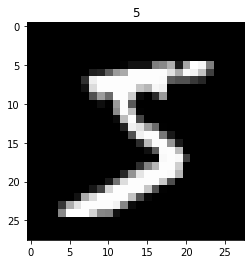

In [2]:
# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

## plot the first picture. Change the index to plot others.
plt.imshow(train_dataset.data[0].numpy(), cmap='gray')
plt.title('%i' % train_dataset.targets[0])

In [3]:
test_dataset = torchvision.datasets.MNIST(root='./data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

In [4]:
# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        ## input is 28*28*1
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        ### add another layer, it takes the 16 channels of layer1 
        ### as input, and returns 32 channels as output. Play with
        ### batch normalization, try ReLU's, and perform pooling.
        self.layer2 = None
        ### the fully connected layer takes the output of layer2 as
        ### input. Adapt the numbers.
        self.fc = nn.Linear(14*14*16, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        ## dont forget to add second layer here
        # sometimes tensors have to be recast from one "shape" to 
        # another. Have a look at the ".shape", ".reshape", and ".view"
        # methods of tensors.
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out


In [5]:
model = ConvNet(num_classes)

In [6]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images
        labels = labels
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.2711
Epoch [1/5], Step [200/600], Loss: 0.2010
Epoch [1/5], Step [300/600], Loss: 0.2018
Epoch [1/5], Step [400/600], Loss: 0.0626
Epoch [1/5], Step [500/600], Loss: 0.1060
Epoch [1/5], Step [600/600], Loss: 0.0625
Epoch [2/5], Step [100/600], Loss: 0.0907
Epoch [2/5], Step [200/600], Loss: 0.0263
Epoch [2/5], Step [300/600], Loss: 0.0167
Epoch [2/5], Step [400/600], Loss: 0.0401
Epoch [2/5], Step [500/600], Loss: 0.1524
Epoch [2/5], Step [600/600], Loss: 0.0602
Epoch [3/5], Step [100/600], Loss: 0.1421
Epoch [3/5], Step [200/600], Loss: 0.1305
Epoch [3/5], Step [300/600], Loss: 0.0456
Epoch [3/5], Step [400/600], Loss: 0.0468
Epoch [3/5], Step [500/600], Loss: 0.0120
Epoch [3/5], Step [600/600], Loss: 0.1175
Epoch [4/5], Step [100/600], Loss: 0.0277
Epoch [4/5], Step [200/600], Loss: 0.0345
Epoch [4/5], Step [300/600], Loss: 0.0321
Epoch [4/5], Step [400/600], Loss: 0.0324
Epoch [4/5], Step [500/600], Loss: 0.0541
Epoch [4/5], Step [600/600], Loss:

In [ ]:
# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images
        labels = labels
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
# torch.save(model.state_dict(), '03_cnn.ckpt')